In [1]:
# jsmateo 2025 | Q2-code for Quiz 1

#### Task 1

In [9]:
# Task 1 (a)
# Install pymupdf to read pdfs
!pip install pymupdf

In [63]:
# Imports
import matplotlib.pyplot as plt
import pymupdf
import re
from collections import Counter

In [6]:
# Import my resume
from google.colab import files
uploaded = files.upload()
my_resume = list(uploaded.keys())[0]

Saving ProfessionalResume2025.docx.pdf to ProfessionalResume2025.docx (1).pdf
ProfessionalResume2025.docx (1).pdf


In [16]:
# Extract content from my resume
doc = pymupdf.open(my_resume)
text = ''
for page in doc:
  text += page.get_text() + ''

# Clean and tokenize the text for processing
resume_words = re.findall(r'\b[a-zA-Z]+\b', text.lower())

# Find the most common words
word_count = Counter(resume_words)
top_words = word_count.most_common(20)


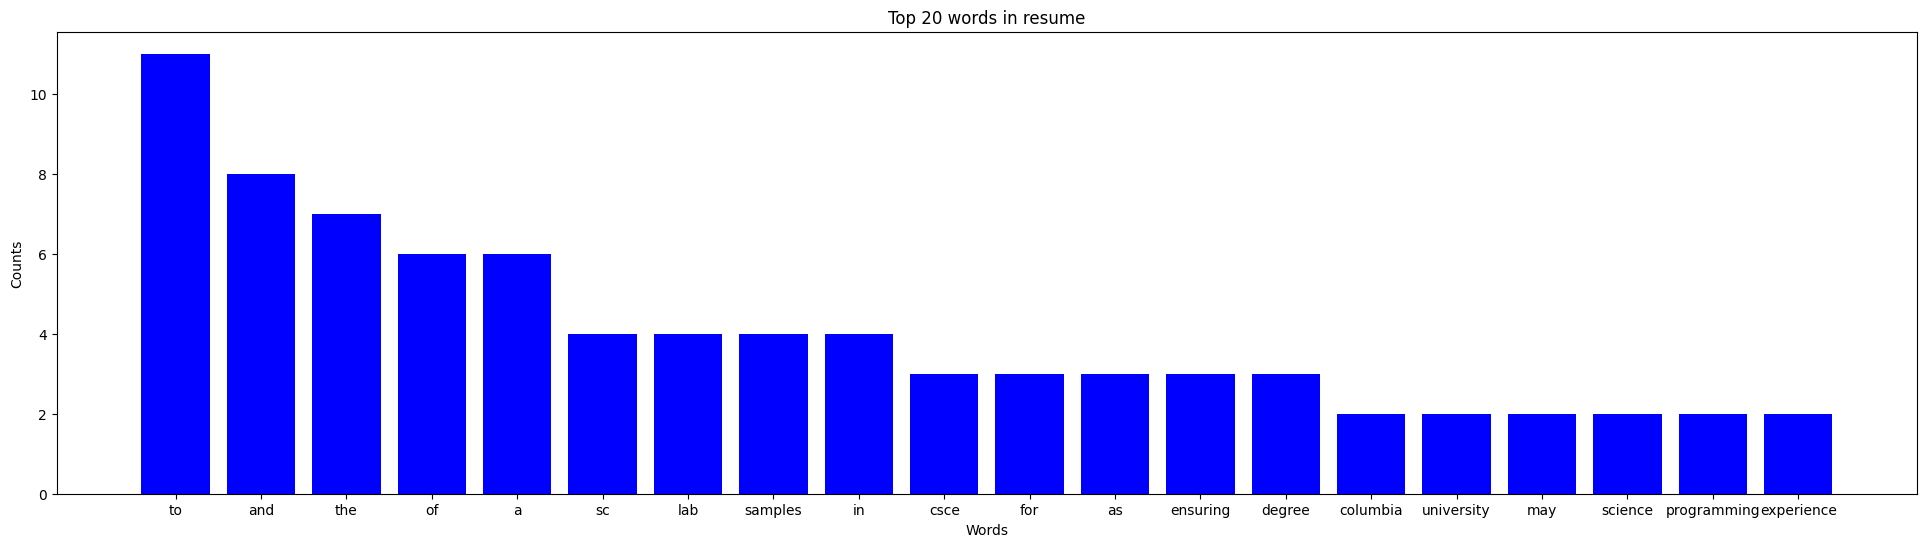

In [25]:
# Plot bar graph of most common words
words, counts = zip(*top_words) # Prepare to plot data
plt.figure(figsize=(24, 6))
plt.bar(words, counts, color='b')
plt.title('Top 20 words in resume')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

In [38]:
# Task 1 (b) Removing stop words
# Get list of common stop words
uploaded = files.upload()

Saving stopwords.txt to stopwords.txt


In [39]:
# Parse the text file
stopwords_file = list(uploaded.keys())[0]

with open(stopwords_file, 'r') as f:
    stop_words = set(line.strip() for line in f)

# Filter out stop words from resume words
filtered_words = [w for w in resume_words if w not in stop_words]
word_count2 = Counter(filtered_words)
specific_words = word_count2.most_common(20)

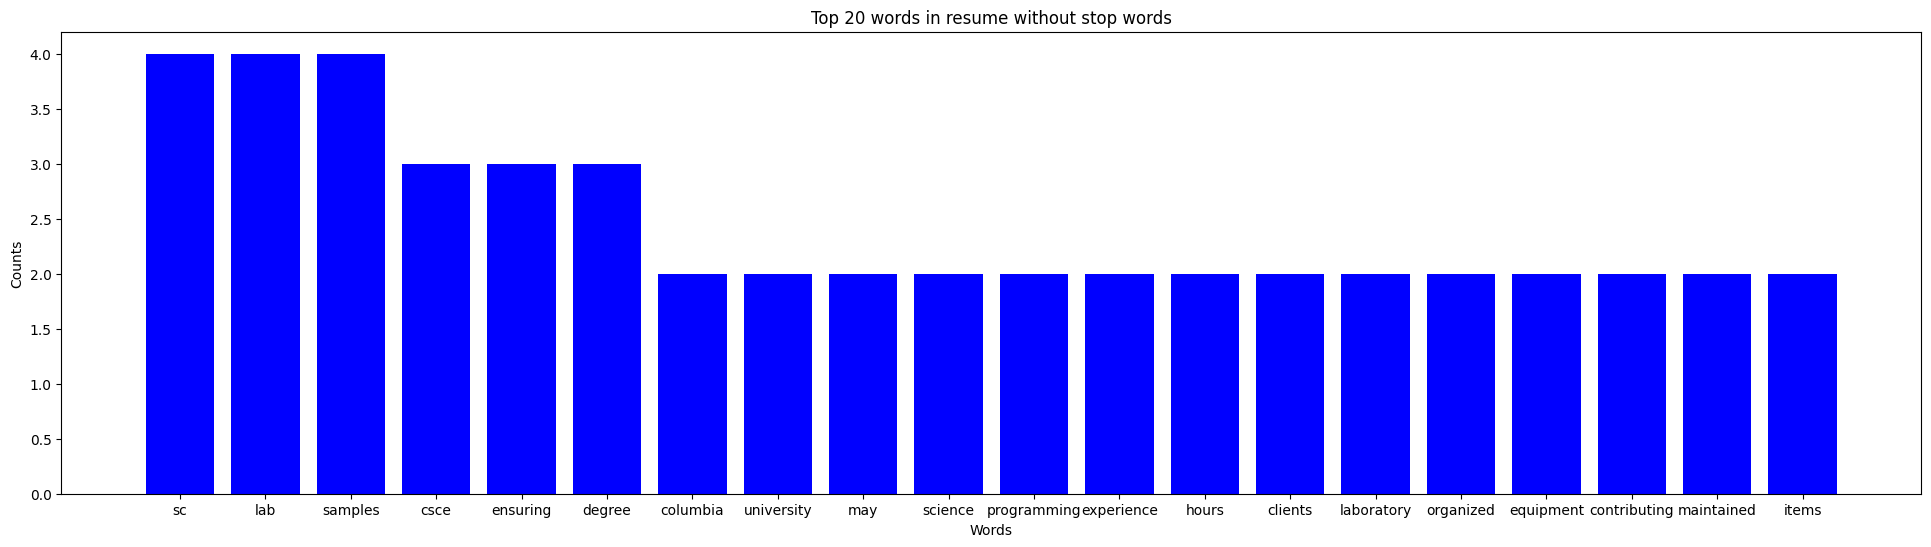

In [41]:
# Plot bar graph of most common words minus stop words
words, counts = zip(*specific_words) # Prepare to plot data
plt.figure(figsize=(24, 6))
plt.bar(words, counts, color='b')
plt.title('Top 20 words in resume without stop words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

#### Task 1 (c) : Analyze

Yes, removing stop words was helpful in revealing more about me. 8 of the top 20 most common words in my resume were stop words. Removing them revealed much more meaningful words that describe me better. Words like "maintained" and "contributing" appeared when they did not before.

#### Task 2

In [44]:
# Connect google drive to import resumes
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Import resumes
# Note : omitting the single non-pdf resume for simplicity's sake
import os
folder_path = "/content/drive/MyDrive/StudentResumes"
all_files = os.listdir(folder_path)
pdf_files = [f for f in all_files if f.lower().endswith(".pdf")]

resume_words = []
for pdf in pdf_files:
  pdf_path = os.path.join(folder_path, pdf)
  doc = pymupdf.open(pdf_path)
  text = ""
  for page in doc:
    text += page.get_text()
  doc_words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
  resume_words.extend(doc_words)

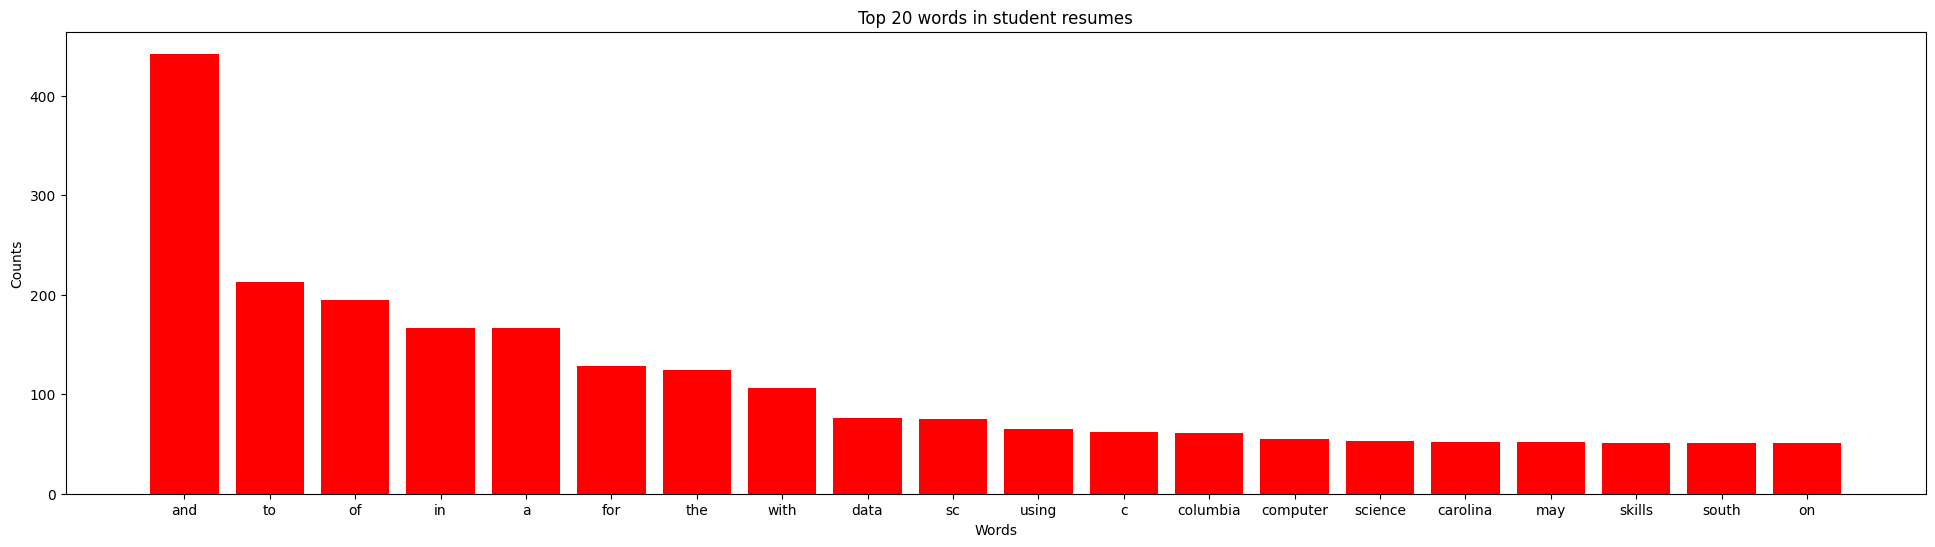

In [59]:
# Plot the top 20 resume words
word_count = Counter(resume_words)
top_words = word_count.most_common(20)

words, counts = zip(*top_words) # Prepare to plot data
plt.figure(figsize=(24, 6))
plt.bar(words, counts, color='r')
plt.title('Top 20 words in student resumes')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

In [61]:
# Filter out stop words from resume words
filtered_words = [w for w in resume_words if w not in stop_words]
word_count = Counter(filtered_words)
specific_words = word_count.most_common(20)

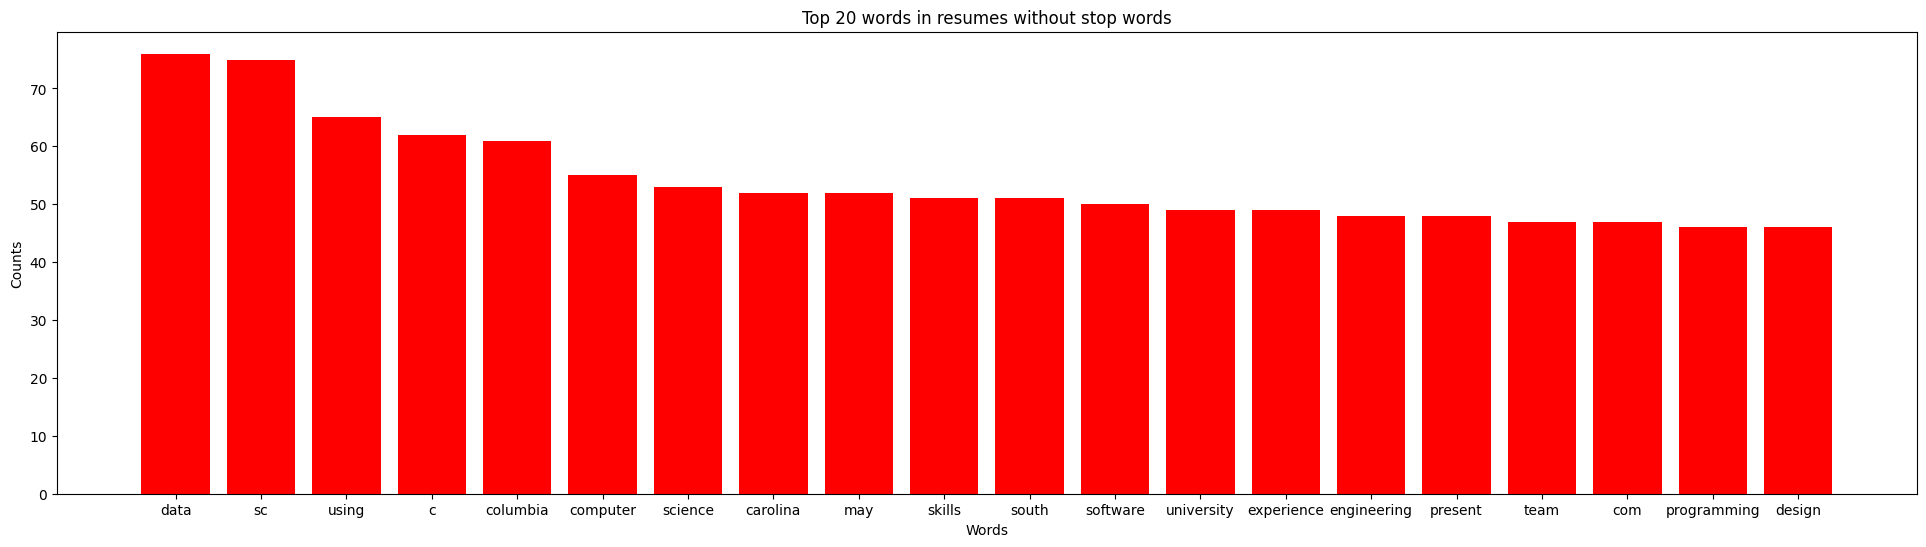

In [62]:
# Plot bar graph of most common words minus stop words
words, counts = zip(*specific_words)
plt.figure(figsize=(24, 6))
plt.bar(words, counts, color='r')
plt.title('Top 20 words in resumes without stop words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

#### Task 3 Analyze:
In my list of specific words, I have many words pertaining to a laboratory due to my time as a lab assistant. These words are not present in the top 20 resume words of the class, examples include samples, laboratory, and equipment. I also share some computer science terms such as programming, and general words like experience.